<a href="https://colab.research.google.com/github/ananyasingh9161/rainfall-prediction/blob/main/Copy_of_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RAINFALL PREDICTION USING ENSEMBLE LEARNING MODEL**

MEMBERS

BHARGAVI KUMARI--
MAE
(02101042024)

ANANYA SINGH--
ECE-AI
(01601182024)

INDIRA GANDHI DELHI TECHNICAL UNIVERSITY FOR WOMEN


In [ ]:
#The dataset used here is 'Weather of Australia' recorded over 10 years from 2008 to 2018 from different locations in Australia.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#mount the drive for accesibilty of the dataset

Mounted at /content/drive


In [ ]:
#import the necessary libaries and models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pandas is used to work with dataframes and numpy for array handling and mathematical operations
#matplotlib and seaborn are used for exploratory data analysis to get to know the trends and patterns

from imblearn.over_sampling import SMOTE
#imbalancedlearn or imblearn is a Python library used for handling the imbalanced dataset
#SMOTE or Synthetic Minority Over-Sampling Technique is used to address the imbalanced dataset where the two categories have a huge difference.
#Rather than duplicating the samples, it generates synthetic samples to balance the dataset for analysis
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
#scikit-learn or sklearn is an open source Python library used to perform various machine learning tasks
#train_test_split is a tool for preparing the dataset for machine learning mainly by splitting it into training and testing datasets
#cross_val_score is a function used to evaluate the performance of the model using cross validation
#RandomizedSearchCV is a techinque used for hyperparameter optimization for large dataset which on using GridSearchCV would take a rather long time
from sklearn.tree import DecisionTreeClassifier
#DecisionTreeClassifier is a supervised machine learning algorithm used for classification tasks
from sklearn.ensemble import RandomForestClassifier
#RandomForestClassifier is an ensemble learning method used for classification tasks
from xgboost import XGBClassifier
#Extreme Gradient Boosting or xgboost is a machine learning library known for its implementation of gradient boosting algorithms
#XGBClassifier is used to for solving classification problems
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#accuracy_score is used to measure the proportion of correct prediction made by the machine learning model
#confusion_matrix is a table used to evaluate the performance of a classification model
#classification_report provides an evaluation of the classification model's performance for each class summarizing metrices like precision, recall, F-1 score and support
from sklearn.preprocessing import LabelEncoder, StandardScaler
#LabelEncoder is used to convert the categorical labels to numerical representations
#StandardScaler is used to standardize features by removing the mean and scaling to unit variance
from sklearn.svm import SVC
#Support Vector Classifier or SVC im SVM algorithm are designed for classification task
from sklearn.linear_model import LogisticRegression
#LogisticRegression is a supervised machine learning algorithm used for binary classification tasks
from sklearn.ensemble import StackingClassifier
#StackingClassifier is an ensemble learning technique that combines multiple individual models to create a more robust and accurate predictive model

In [ ]:
df=pd.read_csv('/content/Weather_Data.csv')
#the dataset is converted into a dataframe which was originally in the csv format

In [ ]:
df.shape
#the shape of the df is checked and it comes out with 3271 rows and 22 columns

(3271, 22)

In [ ]:
df.sample(5)
#any 5 samples are taken from the dataset to get an overview of how the dataset is

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3135,2/9/2017,22.5,30.9,5.4,5.2,11.8,NNE,54,NNW,NE,...,72,55,1018.6,1013.0,3,1,25.7,29.7,Yes,No
1759,4/19/2013,13.3,20.2,0.4,4.6,10.5,SW,65,WSW,SSW,...,50,39,1014.7,1012.8,2,4,15.3,20.0,No,Yes
504,6/22/2009,14.1,21.0,12.2,1.8,6.7,W,41,WNW,NE,...,96,59,1020.3,1017.7,7,2,15.1,20.6,Yes,No
1617,9/28/2012,18.9,33.2,0.0,6.4,6.0,NNW,65,ENE,NW,...,63,29,1009.7,1003.5,5,7,21.7,31.2,No,Yes
2459,3/28/2015,14.7,24.5,0.0,7.0,10.9,W,37,W,ESE,...,39,45,1023.4,1021.9,1,2,18.5,22.2,No,No


In [ ]:
df.describe()
#this provides the statistical computations of the acquired dataset which are numerical

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
std,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [ ]:
df.info()
#it provides the summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [ ]:
df=df.drop('Date',axis=1)
#drop() method drops the specified row(s) or column(s)
#axis=1 is used for column
#the date column is dropped since it doesn't have any use in the model

In [ ]:
df.head()
#it gives the first five rows of the dataset

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,17,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,3.4,2.7,W,41,W,E,9,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,17,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,22,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,11,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [ ]:
df.duplicated().sum()
#check the number of duplicated items

np.int64(0)

In [ ]:
df.columns
#gives the column names

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
columns=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']
#create a list of columns

for col in df.columns:
  numerical_features=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']
  if col not in numerical_features:
    print(f"{col}: {df[col].unique()}")
    print("---------")

#separate the numerical features with the categorical ones and get the unique values of the categorical features

WindGustDir: ['W' 'NNW' 'WNW' 'ENE' 'NNE' 'NW' 'SSE' 'NE' 'ESE' 'WSW' 'SE' 'SW' 'N' 'E'
 'SSW' 'S']
---------
WindDir9am: ['S' 'W' 'ESE' 'NNE' 'SSW' 'WNW' 'N' 'SW' 'SE' 'SSE' 'WSW' 'E' 'ENE' 'NW'
 'NNW' 'NE']
---------
WindDir3pm: ['SSW' 'E' 'ESE' 'W' 'ENE' 'S' 'SE' 'SSE' 'NE' 'NNE' 'NNW' 'NW' 'WNW' 'N'
 'WSW' 'SW']
---------
RainToday: ['Yes' 'No']
---------
RainTomorrow: ['Yes' 'No']
---------


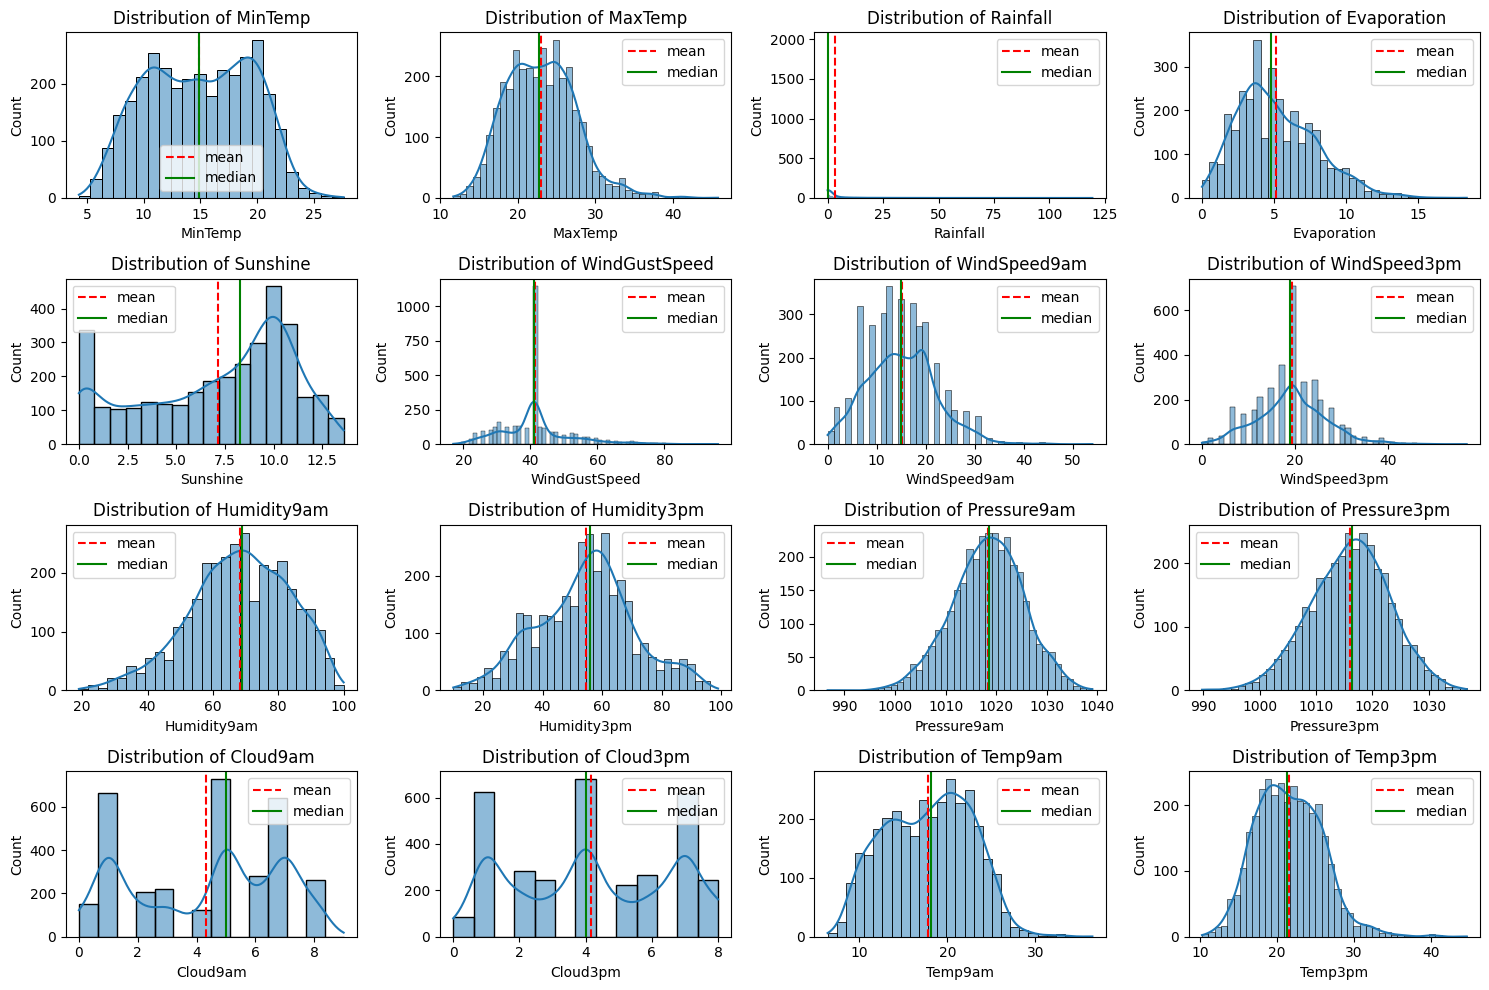

In [ ]:
num_columns=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']

plt.figure(figsize=(15,10))
#sets the overall size of the window
for i,col in enumerate(num_columns,1): #enumerate is a function that is used to counter the iterable
  plt.subplot(4,4,i) #creates a 4x4 grid putting each subplot in its place
  sns.histplot(df[col],kde=True) #creates a histogram using seaborn with kernal density estimate(kde)
  plt.axvline(df[col].mean(),color='red',linestyle='--',label='mean') #draws a vertical line at the place of mean
  plt.axvline(df[col].median(),color='green',linestyle='-',label='median') #draws a vertical line at the place of median
  plt.legend() #shows the mean and median labels in the plot
  plt.title(f'Distribution of {col}') #generates the title of each plot
  plt.xlabel(col) #names the x label
plt.tight_layout() #automatically adjusts the subplot spacing to prevent overlap
plt.show() #displays the figures

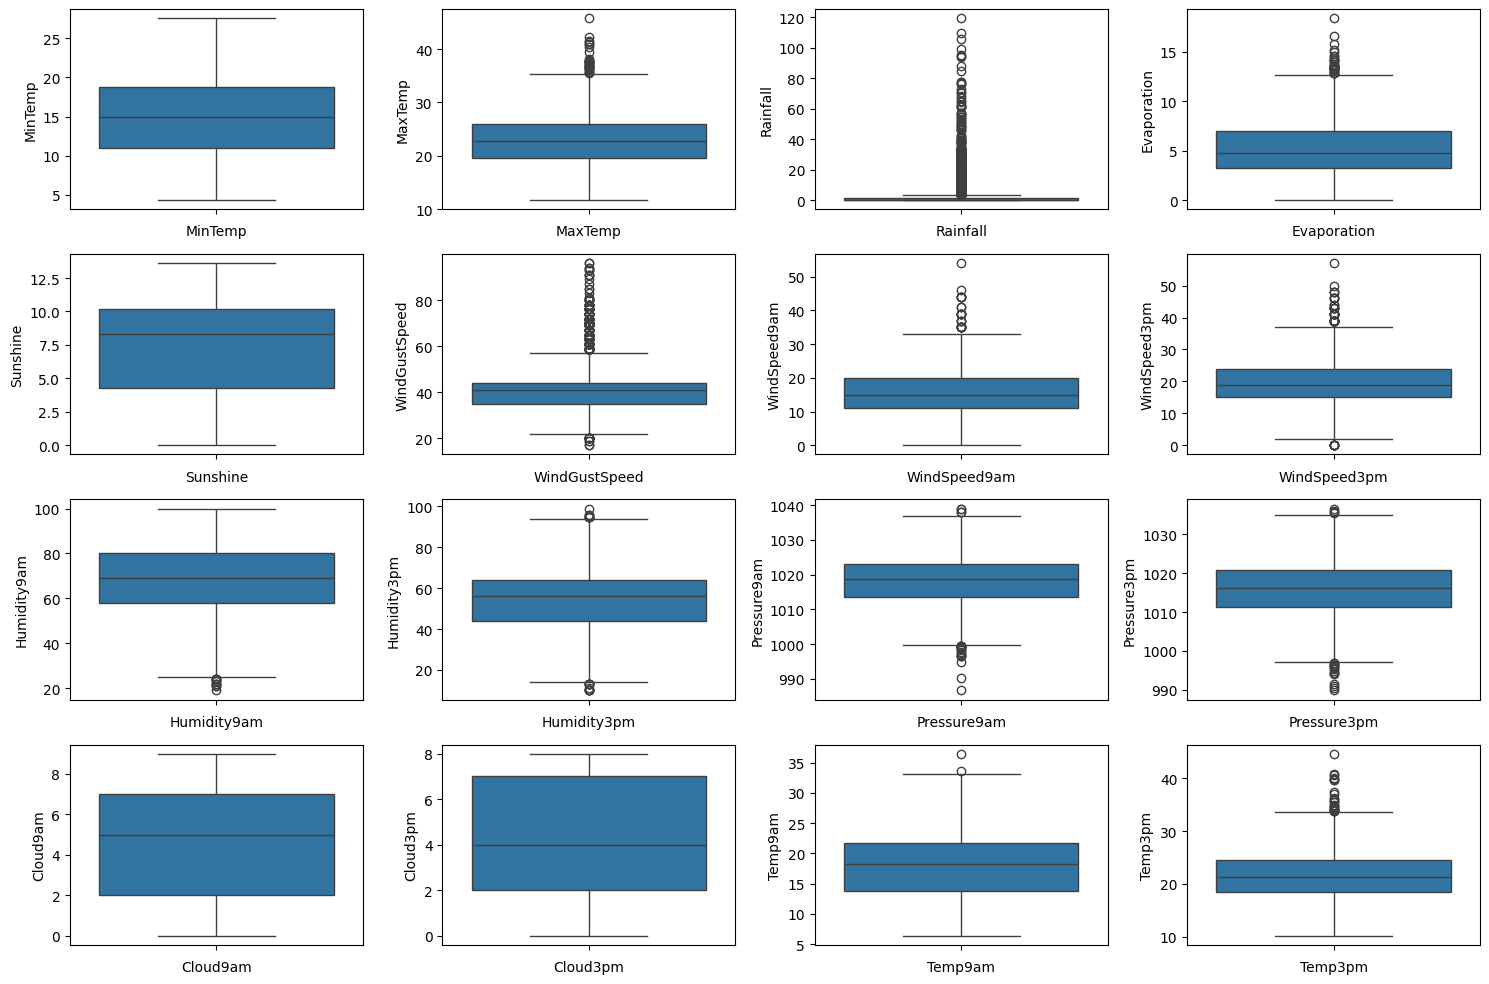

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_columns,1):
  plt.subplot(4,4,i)
  sns.boxplot(df[col]) #used to generate boxplot
  plt.xlabel(col)
plt.tight_layout()
plt.show()

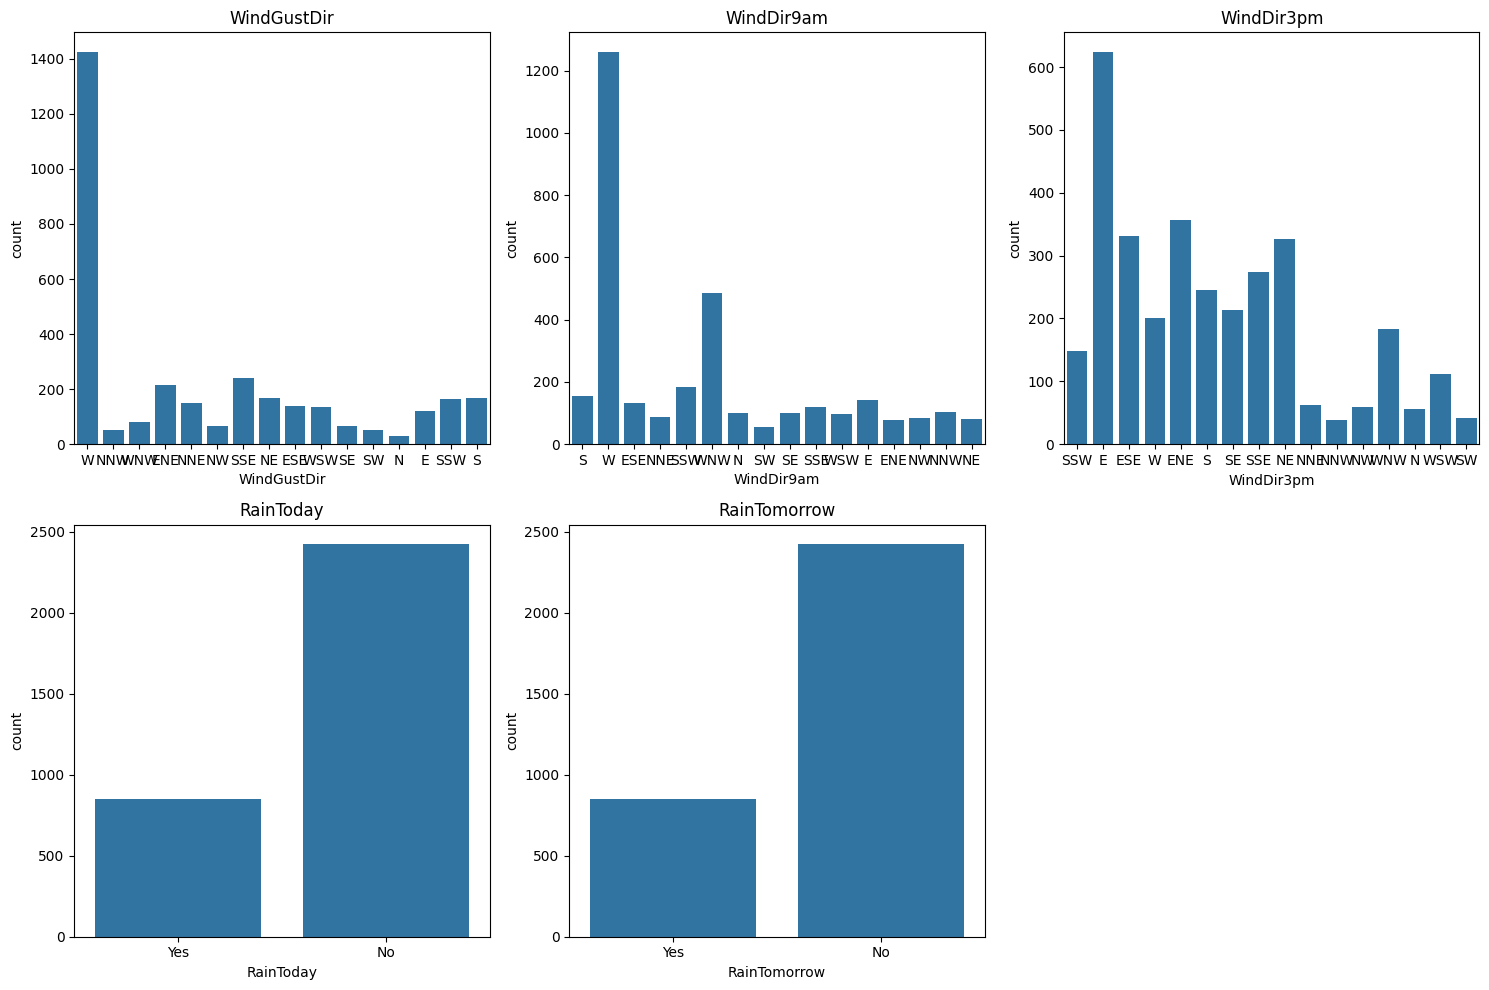

In [ ]:
categorical_col=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

plt.figure(figsize=(15,10))
for i,cols in enumerate(categorical_col,1):
  plt.subplot(2,3,i)
  sns.countplot(x=df[cols])
  plt.title(cols)
  plt.ylabel('count')
plt.tight_layout()
plt.show()

#generating countplots for the categorical columns
#from this we can infer that the difference between the yes and no columns is huge that means that the data is imbalanced

In [ ]:
#change the categorical columns to numerical ones
encoders={} #an empty dictionary is created to store the label encoder for each column
for column in categorical_col:
  label_encoder=LabelEncoder() #creates a new label encoder object for each categorical column
  df[column]=label_encoder.fit_transform(df[column]) #the original values are replaced by the integer values in which they are tranformed
  encoders[column]=label_encoder #stores the label encoder for that column

In [ ]:
encoders

{'WindGustDir': LabelEncoder(),
 'WindDir9am': LabelEncoder(),
 'WindDir3pm': LabelEncoder(),
 'RainToday': LabelEncoder(),
 'RainTomorrow': LabelEncoder()}

In [ ]:
for column, encoder in encoders.items():
  print(f'\n Encoding for column: {column}')
  for idx, label in enumerate(encoder.classes_):
    print(f'{label} : {idx}')

#this is used to specify which encoding belongs to the encoded item


 Encoding for column: WindGustDir
E : 0
ENE : 1
ESE : 2
N : 3
NE : 4
NNE : 5
NNW : 6
NW : 7
S : 8
SE : 9
SSE : 10
SSW : 11
SW : 12
W : 13
WNW : 14
WSW : 15

 Encoding for column: WindDir9am
E : 0
ENE : 1
ESE : 2
N : 3
NE : 4
NNE : 5
NNW : 6
NW : 7
S : 8
SE : 9
SSE : 10
SSW : 11
SW : 12
W : 13
WNW : 14
WSW : 15

 Encoding for column: WindDir3pm
E : 0
ENE : 1
ESE : 2
N : 3
NE : 4
NNE : 5
NNW : 6
NW : 7
S : 8
SE : 9
SSE : 10
SSW : 11
SW : 12
W : 13
WNW : 14
WSW : 15

 Encoding for column: RainToday
No : 0
Yes : 1

 Encoding for column: RainTomorrow
No : 0
Yes : 1


In [ ]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,13,41,8,11,17,...,92,84,1017.6,1017.4,8,8,20.7,20.9,1,1
1,19.5,25.6,6.0,3.4,2.7,13,41,13,0,9,...,83,73,1017.9,1016.4,7,7,22.4,24.8,1,1
2,21.6,24.5,6.6,2.4,0.1,13,41,2,2,17,...,88,86,1016.7,1015.6,7,8,23.5,23.0,1,1
3,20.2,22.8,18.8,2.2,0.0,13,41,5,0,22,...,83,90,1014.2,1011.8,8,8,21.4,20.9,1,1
4,19.7,25.7,77.4,4.8,0.0,13,41,5,13,11,...,88,74,1008.3,1004.8,8,8,22.5,25.5,1,1


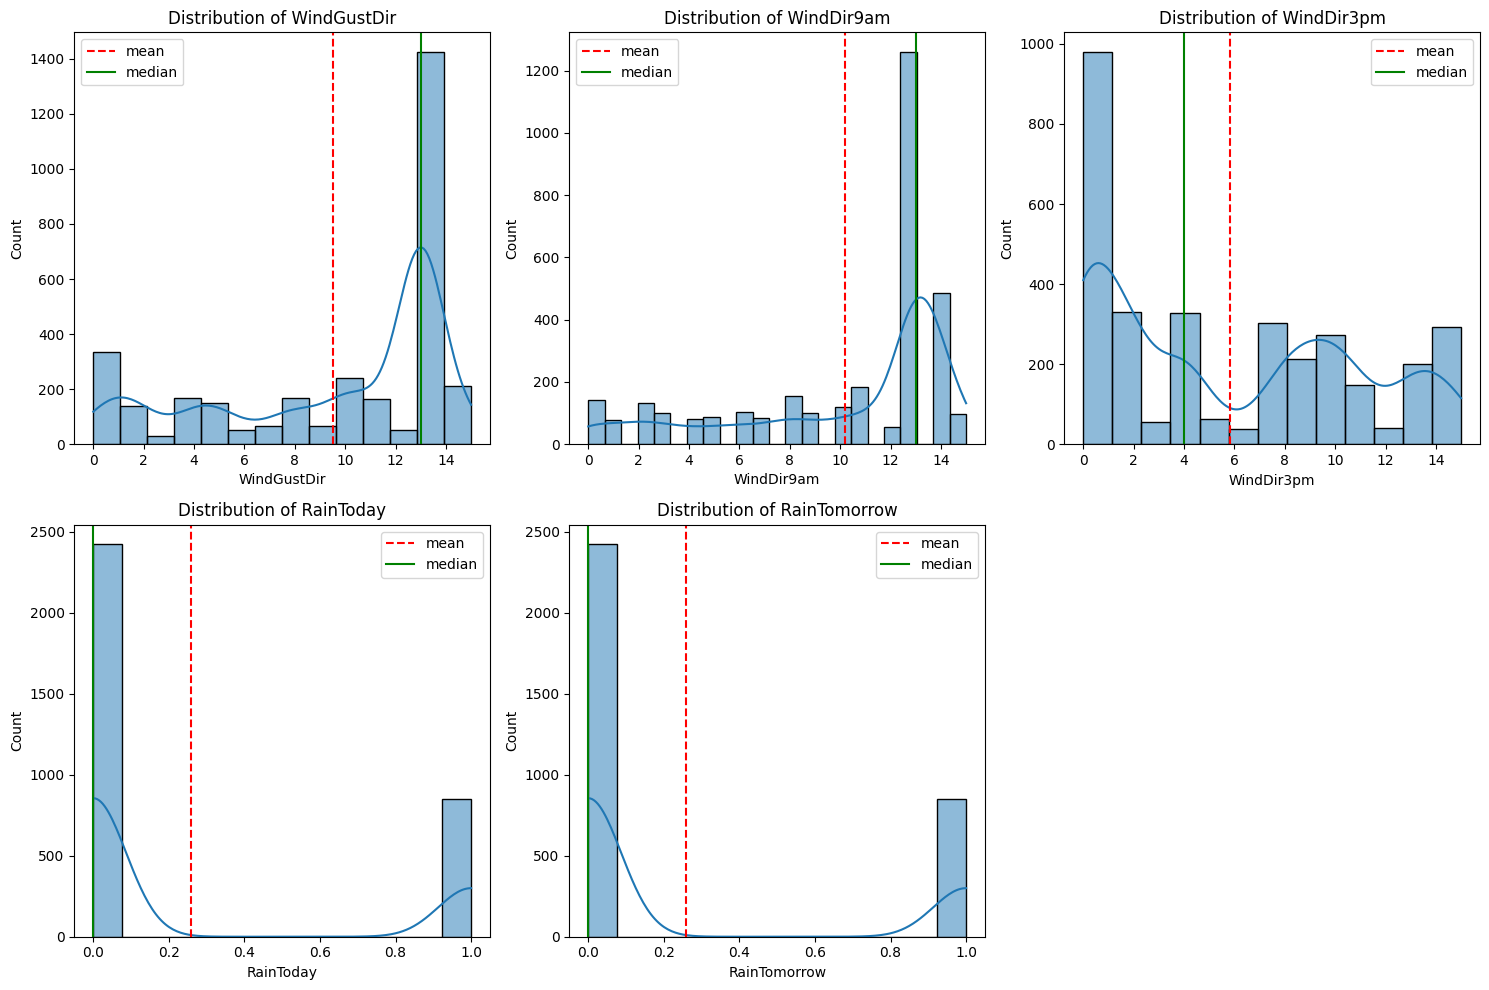

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(categorical_col,1):
  plt.subplot(2,3,i)
  sns.histplot(df[col],kde=True)
  plt.axvline(df[col].mean(),color='red',linestyle='--',label='mean')
  plt.axvline(df[col].median(),color='green',linestyle='-',label='median')
  plt.legend()
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
plt.tight_layout()
plt.show()

#generating histogram plots for the encoded categorical values

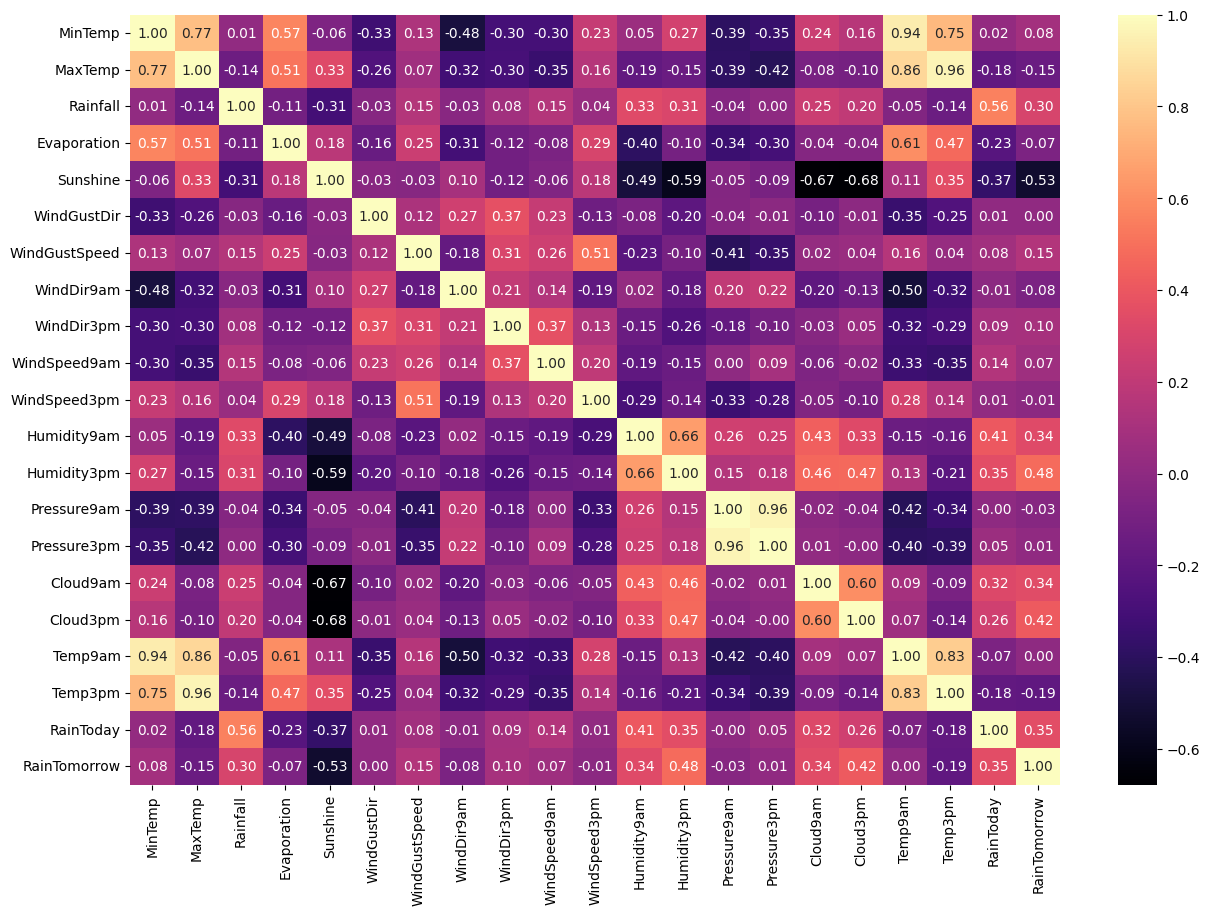

In [ ]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), annot=True, cmap="magma", fmt=".2f")
plt.show()

#generating heatmap for the encoded categorical values

In [ ]:
corr_with_target=df.corr(numeric_only=True)['RainTomorrow']
corr_with_target

#calculating the correlation of each numeric column with the target column 'rain tomorrow'
#as the positive correlation increases, chances of rain tomorrow increases amd as negative correaltion increases, chances of rain tomorrow decreases

,RainTomorrow
MinTemp,0.082804
MaxTemp,-0.152525
Rainfall,0.296120
Evaporation,-0.070145
Sunshine,-0.529112
WindGustDir,0.004532
WindGustSpeed,0.145382
WindDir9am,-0.080385
WindDir3pm,0.100092
WindSpeed9am,0.065510


In [ ]:
corr_with_target=corr_with_target.drop('RainTomorrow')
weak_features=corr_with_target[corr_with_target.abs()<0.1]

#identifying weak features and dropping them as they are unlikely to improve the predictive power of our model
#such features can also lead to conditions like overfitting

In [ ]:
print(weak_features)

MinTemp         0.082804
Evaporation    -0.070145
WindGustDir     0.004532
WindDir9am     -0.080385
WindSpeed9am    0.065510
WindSpeed3pm   -0.013658
Pressure9am    -0.034140
Pressure3pm     0.007827
Temp9am         0.000125
Name: RainTomorrow, dtype: float64


In [ ]:
df=df.drop(columns=weak_features.index)
#dropping the unwanted columns

In [ ]:
df.head()
#new dataset

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindDir3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,22.4,15.6,0.0,41,11,92,84,8,8,20.9,1,1
1,25.6,6.0,2.7,41,0,83,73,7,7,24.8,1,1
2,24.5,6.6,0.1,41,2,88,86,7,8,23.0,1,1
3,22.8,18.8,0.0,41,0,83,90,8,8,20.9,1,1
4,25.7,77.4,0.0,41,13,88,74,8,8,25.5,1,1


In [ ]:
x=df.drop(columns=['RainTomorrow'])
y=df['RainTomorrow']
#target dataset is dropped from df and a new series is generated with it

# Identify numerical columns for scaling (excluding the already encoded categorical columns)
numerical_cols_after_drop = x.select_dtypes(include=np.number).columns.tolist()

# Scale the numerical features
scaler=StandardScaler()
x[numerical_cols_after_drop]=scaler.fit_transform(x[numerical_cols_after_drop])

In [ ]:
x
#it contains the columns other than the target column

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindDir3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday
0,-0.135078,1.236139,-1.878965,-0.044081,1.037252,1.574935,1.800202,1.457110,1.586088,-0.149813,1.689014
1,0.578719,0.268029,-1.171303,-0.044081,-1.166028,0.978269,1.124391,1.061312,1.171306,0.757924,1.689014
2,0.333351,0.328536,-1.852755,-0.044081,-0.765432,1.309750,1.923076,1.061312,1.586088,0.338969,1.689014
3,-0.045853,1.558843,-1.878965,-0.044081,-1.166028,0.978269,2.168826,1.457110,1.586088,-0.149813,1.689014
4,0.601025,7.468346,-1.878965,-0.044081,1.437848,1.309750,1.185828,1.457110,1.586088,0.920852,1.689014
...,...,...,...,...,...,...,...,...,...,...,...
3266,-0.759650,-0.337039,0.165391,-0.414270,0.836954,0.315307,-0.165792,-0.917682,-0.902604,-0.848073,-0.592061
3267,-0.848875,-0.337039,0.532327,-1.062100,-0.765432,0.646788,-0.104355,-0.917682,-0.902604,-0.661870,-0.592061
3268,-1.183467,-0.337039,-1.171303,-1.617383,-0.565133,1.110862,0.079957,0.665513,0.756524,-0.987725,-0.592061
3269,-0.826569,-0.337039,0.558536,0.141014,1.437848,-0.811728,-1.210227,0.269714,-0.902604,-0.592044,-0.592061


In [ ]:
y
#target column

,RainTomorrow
0,1
1,1
2,1
3,1
4,1
...,...
3266,0
3267,0
3268,0
3269,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

#split the dataset into training and testing datset x for features and y for the testing
#test_size=0.2, means 20% of the data is used for testing and 80% for training
#random_state=42 sets a seed for reproducibility
#stratify=y ensures both training and testing sets

In [ ]:
x_train.shape

(2616, 11)

In [ ]:
y_train.value_counts()
#it shows the number of values of No(0) and Yes(1)

,count
RainTomorrow,
0,1937
1,679


In [ ]:
smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)
#balance the minority samples by creating synthetic samples for minority sample

In [ ]:
print(x_train_resampled.shape)
#the sample number is increased

(3874, 11)


In [ ]:
print(y_train_resampled.shape)

(3874,)


In [ ]:
models={'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'XGBoost': XGBClassifier(random_state=42),
        'SVC model':SVC(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)}

#dictionary with all the models

In [ ]:
cv_scores={}
for name,model in models.items():
  scores=cross_val_score(model,x_train_resampled,y_train_resampled,cv=5,scoring='accuracy')
  cv_scores[name]=scores
  print(name,'average accuracy:',round(np.mean(scores),4))

#this loop performs 5 fold cross validation for each model and calculates the average accuracy

Decision Tree average accuracy: 0.8183
Random Forest average accuracy: 0.882
XGBoost average accuracy: 0.8756
SVC model average accuracy: 0.8147
Logistic Regression average accuracy: 0.7976


In [ ]:
cv_scores

{'Decision Tree': array([0.78451613, 0.78451613, 0.83870968, 0.82967742, 0.85400517]),
 'Random Forest': array([0.83096774, 0.86064516, 0.8916129 , 0.89806452, 0.92894057]),
 'XGBoost': array([0.78322581, 0.82709677, 0.90709677, 0.91612903, 0.94444444]),
 'SVC model': array([0.79741935, 0.81806452, 0.80645161, 0.81290323, 0.83850129]),
 'Logistic Regression': array([0.77548387, 0.79870968, 0.78451613, 0.81290323, 0.81653747])}

In [ ]:
average_cv_scores = {name: np.mean(scores) for name, scores in cv_scores.items()}
sorted_models = sorted(average_cv_scores.items(), key=lambda item: item[1], reverse=True)
print("Average Cross-Validation Scores:")
for name, score in sorted_models:
    print(f"{name}: {score:.4f}")

#mean average scores across validation fols for each model is calculated helping to sort the best ones

Average Cross-Validation Scores:
Random Forest: 0.8820
XGBoost: 0.8756
Decision Tree: 0.8183
SVC model: 0.8147
Logistic Regression: 0.7976


In [ ]:
top_models_names = [name for name, score in sorted_models[:3]]
print("Top models for GridSearchCV tuning:", top_models_names)

#top 3 models are selected for hyperparameter optimization

Top models for GridSearchCV tuning: ['Random Forest', 'XGBoost', 'Decision Tree']


In [ ]:
decision_tree=DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)
xgboost=XGBClassifier(random_state=42)
svc=SVC(random_state=42)
logistic_regression=LogisticRegression(random_state=42, max_iter=1000)

#initializing the classifiers

In [ ]:
param_grid_dt={'criterion':['gini','entropy'],  #measures the split nodes
    'max_depth': [None, 10, 20, 30,50,70], #maximum depth of the tree
    'min_samples_split': [2, 5, 10], #minimum number of samples required to split an internal node
    'min_samples_leaf': [1,2,4]}  #minimum number of samples to be at leaf node

param_grid_rf={'n_estimators': [50, 100, 200,500], #number of trees in the forest
    'max_depth': [None, 10,20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4],
    'bootstrap':[True,False]} #whether bootstrap samples are used when building trees

param_grid_xgb={'n_estimators': [50, 100,200,500],
                'max_depth':[3,5,7,10],
                'learning_rate':[0.01,0.1,0.2,0.3],  #step size shrinkage used in updating weights
                'subsample':[0.5,0.7,1.0],  #fraction of samples for fitting trees
                'colsample_bytree':[0.5,0.7,1.0]} #fraction of column for creating each tree
param_grid_svc={'C': [0.1, 1, 10, 100], # Regularization parameter.
                'gamma': ['scale', 'auto'], # Kernel coefficient.
                'kernel': ['rbf', 'linear']} # Specifies the kernel type to be used in the algorithm.

param_grid_lr={'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength.
               'penalty': ['l1', 'l2'], # Specify the norm used in the penalization.
               'solver': ['liblinear', 'saga']} # Algorithm to use in the optimization problem.

In [ ]:
random_search_dt=RandomizedSearchCV(estimator=decision_tree,
                                    param_distributions=param_grid_dt,n_iter=20,cv=5,scoring='accuracy',
                                      random_state=42,n_jobs=-1)
random_search_rf=RandomizedSearchCV(estimator=random_forest,
                                    param_distributions=param_grid_rf,n_iter=20,cv=5,scoring='accuracy',
                                      random_state=42,n_jobs=-1)
random_search_xgb=RandomizedSearchCV(estimator=xgboost,
                                    param_distributions=param_grid_xgb,n_iter=20,cv=5,scoring='accuracy',
                                      random_state=42,n_jobs=-1)
random_search_svc = RandomizedSearchCV(estimator=svc,
                                     param_distributions=param_grid_svc, n_iter=16, cv=5, scoring='accuracy',
                                     random_state=42, n_jobs=-1)
random_search_lr = RandomizedSearchCV(estimator=logistic_regression,
                                    param_distributions=param_grid_lr, n_iter=20, cv=5, scoring='accuracy',
                                    random_state=42, n_jobs=-1)
#random  search over the hyperparameters

In [ ]:
random_search_dt.fit(x_train_resampled,y_train_resampled)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 50, 70],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy')

In [ ]:
random_search_rf.fit(x_train_resampled,y_train_resampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [ ]:
random_search_xgb.fit(x_train_resampled,y_train_resampled)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
random_search_svc.fit(x_train_resampled,y_train_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'linear']},
                   random_state=42, scoring='accuracy')

In [ ]:
random_search_lr.fit(x_train_resampled,y_train_resampled)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy')

In [ ]:
estimators = [('dt',random_search_dt),
    ('rf', random_search_rf.best_estimator_),
    ('xgb', random_search_xgb.best_estimator_),
    ('svc',random_search_svc.best_estimator_),
    ('lr',random_search_lr.best_estimator_)]
#the models to be included for stacking ensemble

meta_estimator = LogisticRegression(random_state=42, max_iter=1000)
#it combines the predictions of the base models

stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_estimator, cv=5)
stacking_scores = cross_val_score(stacking_model, x_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
#creates a stacking model using cross validation

print('Stacking Ensemble average accuracy:', round(np.mean(stacking_scores), 4))

Stacking Ensemble average accuracy: 0.8908


In [ ]:
random_search_dt.best_params_
#displays the best model for each parameter

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'criterion': 'gini'}

In [ ]:
random_search_rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'bootstrap': False}

In [ ]:
random_search_xgb.best_params_

{'subsample': 1.0,
 'n_estimators': 200,
 'max_depth': 10,
 'learning_rate': 0.2,
 'colsample_bytree': 1.0}

In [ ]:
random_search_svc.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 100}

In [ ]:
random_search_lr.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 10}

In [ ]:
#choose the best among the models
best_model=None
best_score=0
if random_search_dt.best_score_>best_score:
  best_model=random_search_dt.best_estimator_
  best_score=random_search_dt.best_score_

if random_search_rf.best_score_>best_score:
  best_model=random_search_rf.best_estimator_
  best_score=random_search_rf.best_score_

if random_search_xgb.best_score_>best_score:
  best_model=random_search_xgb.best_estimator_
  best_score=random_search_xgb.best_score_

if random_search_svc.best_score_>best_score:
  best_model=random_search_svc.best_estimator_
  best_score=random_search_svc.best_score_

if random_search_lr.best_score_>best_score:
  best_model=random_search_lr.best_estimator_
  best_score=random_search_lr.best_score_

In [ ]:
print(best_model)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)


In [ ]:
print(f'{best_score:.2f} ')

0.89 


In [ ]:
y_test_pred=best_model.predict(x_test) #uses the trained model to predict outcomes for your test dataset

In [ ]:
print(accuracy_score(y_test,y_test_pred))  #calculates the proportion of correct predictions
print(confusion_matrix(y_test,y_test_pred))  #shows a matric indicating correct vs incorrect predictions for each class
print(classification_report(y_test,y_test_pred)) #gives a summary of the report

0.8061068702290076
[[426  59]
 [ 68 102]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       485
           1       0.63      0.60      0.62       170

    accuracy                           0.81       655
   macro avg       0.75      0.74      0.74       655
weighted avg       0.80      0.81      0.80       655



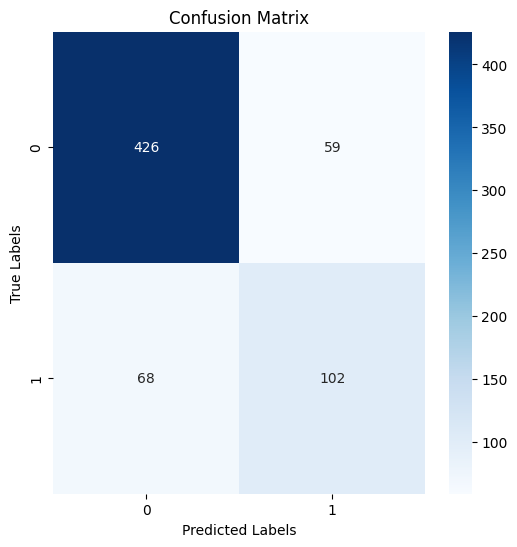

In [ ]:
#confusion matrix for the original model
cm=confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Stacking Model Evaluation on Test Set:
Accuracy: 0.8061068702290076

Confusion Matrix:
 [[432  53]
 [ 74  96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       485
           1       0.64      0.56      0.60       170

    accuracy                           0.81       655
   macro avg       0.75      0.73      0.74       655
weighted avg       0.80      0.81      0.80       655



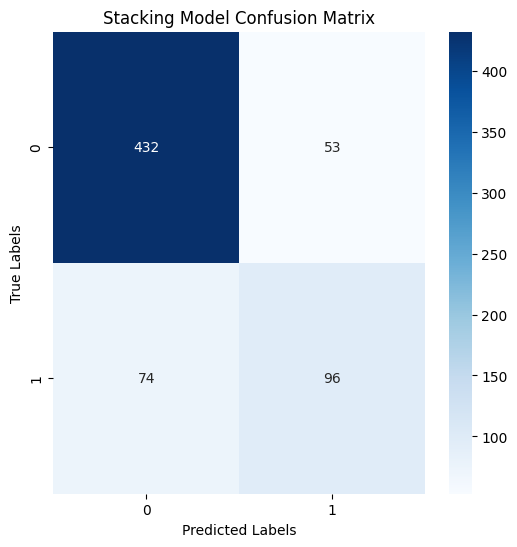

In [ ]:
#Evaluate the stacking model on the test set
stacking_model.fit(x_train_resampled, y_train_resampled)
y_test_pred_stacking=stacking_model.predict(x_test)

print("Stacking Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_stacking))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred_stacking))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_stacking))

cm_stacking=confusion_matrix(y_test, y_test_pred_stacking)
plt.figure(figsize=(6,6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Blues')
plt.title('Stacking Model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
#from the above obsevations we can conclude that the stacking model generates a higher accuracy than the original one